ADHITHYA PERUMAL.D

212222230007

In [46]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [47]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [48]:
X_train.shape


(60000, 28, 28)

In [49]:
X_test.shape


(10000, 28, 28)

In [50]:
single_image= X_train[0]


In [51]:
single_image.shape


(28, 28)

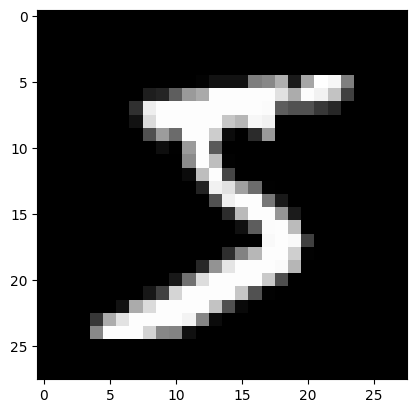

In [52]:
plt.imshow(single_image,cmap='gray')



In [53]:
y_train.shape


(60000,)

In [54]:

X_train.min()


0

In [55]:
X_train.max()


255

In [56]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [57]:

X_train_scaled.min()

0.0

In [58]:
X_train_scaled.max()

1.0

In [59]:
y_train[0]

5

In [60]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [61]:
type(y_train_onehot)


numpy.ndarray

In [62]:
y_train_onehot.shape


(60000, 10)

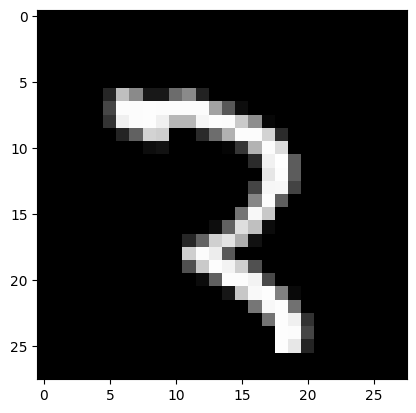

In [63]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [64]:
y_train_onehot[500]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [65]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [66]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [67]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                173088    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 173738 (678.66 KB)
Trainable params: 173738 (678.66 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [68]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [69]:
print('ADHITHYA PERUMAL D 212222230007')
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

ADHITHYA PERUMAL D 212222230007
Epoch 1/5
938/938 [==============================] - 28s 29ms/step - loss: 0.2310 - accuracy: 0.9335 - val_loss: 0.0878 - val_accuracy: 0.9724
Epoch 2/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0788 - accuracy: 0.9760 - val_loss: 0.0667 - val_accuracy: 0.9777
Epoch 3/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0560 - accuracy: 0.9836 - val_loss: 0.0588 - val_accuracy: 0.9794
Epoch 4/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0448 - accuracy: 0.9864 - val_loss: 0.0558 - val_accuracy: 0.9817
Epoch 5/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0368 - accuracy: 0.9888 - val_loss: 0.0493 - val_accuracy: 0.9835


In [70]:

metrics = pd.DataFrame(model.history.history)


In [71]:
print("Adhithya Perumal.D 212222230007")
metrics.head()

Adhithya Perumal.D 212222230007


,loss,accuracy,val_loss,val_accuracy
0,0.230987,0.933483,0.087768,0.9724
1,0.078818,0.976033,0.066652,0.9777
2,0.055951,0.983617,0.058836,0.9794
3,0.044785,0.986433,0.055841,0.9817
4,0.036813,0.988833,0.049337,0.9835


Adhithya Perumal.D 212222230007


<Axes: >

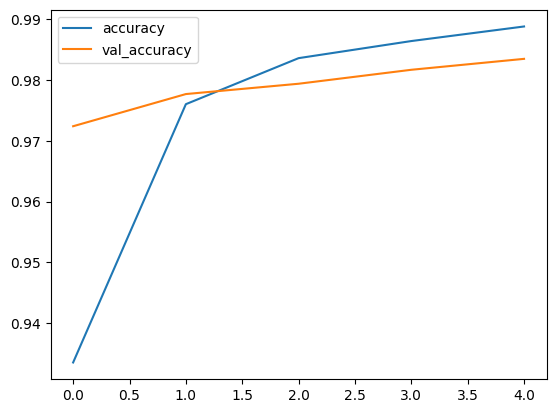

In [72]:
print("Adhithya Perumal.D 212222230007")
metrics[['accuracy','val_accuracy']].plot()

Adhithya Perumal.D 212222230007


<Axes: >

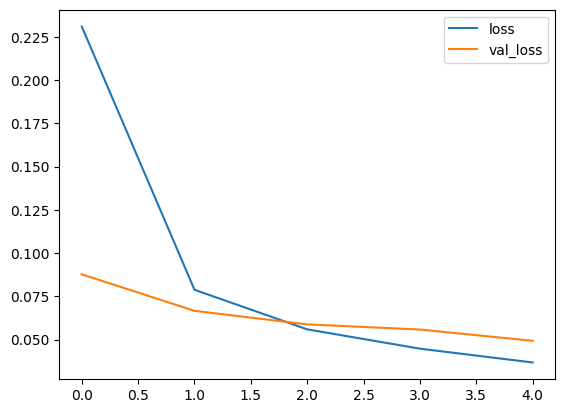

In [73]:
print("Adhithya Perumal.D 212222230007")
metrics[['loss','val_loss']].plot()

In [74]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 2s 6ms/step


In [75]:
print("Adhithya Perumal.D 212222230007")
print(confusion_matrix(y_test,x_test_predictions))

Adhithya Perumal.D 212222230007
[[ 974    0    1    1    0    1    1    0    1    1]
 [   0 1131    2    1    0    0    0    1    0    0]
 [   2    3 1017    0    2    0    0    4    2    2]
 [   0    0    4  995    0    7    0    2    2    0]
 [   1    0    0    0  973    0    0    0    2    6]
 [   2    0    1    3    0  883    3    0    0    0]
 [   7    3    0    0    2    4  942    0    0    0]
 [   2    5   12    3    0    1    0  999    2    4]
 [   5    0    6    2    2    4    2    3  944    6]
 [   2    3    1    1    9    8    0    7    1  977]]


In [76]:
print("Adhithya Perumal.D 212222230007")
print(classification_report(y_test,x_test_predictions))

Adhithya Perumal.D 212222230007
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.97      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [88]:
img = image.load_img('/content/77.png')

In [78]:
print("Adhithya Perumal.D 212222230007")
type(img)


Adhithya Perumal.D 212222230007


PIL.Image.Image

In [89]:
img = image.load_img('/content/77.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [90]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [91]:
print("Adhithya Perumal.D 212222230007")
print(x_single_prediction)

Adhithya Perumal.D 212222230007
[7]


Adhithya Perumal.D 212222230007


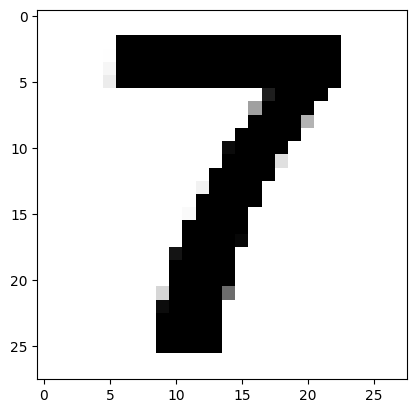

In [92]:
print("Adhithya Perumal.D 212222230007")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [93]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [94]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [95]:
print("Adhithya Perumal.D 212222230007")
print(x_single_prediction)

Adhithya Perumal.D 212222230007
[1]
